In [149]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

try:
    from tabulate import tabulate
except NameError as e:
    print('Falta uma biblioteca'+e)

%matplotlib inline

In [22]:
data = pd.read_csv('./data/data_01.csv', sep = ';', decimal = ',')

In [23]:
data['m01']

0    0.718
1    0.712
2    0.698
3    0.710
4    0.714
5    0.712
6    0.706
7    0.708
8    0.700
9    0.713
Name: m01, dtype: float64

In [24]:
data.columns

Index(['i', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'Dm', 's', 'R', 'D',
       'EQM', 'm01', 'm02', 'm03', 'm04', 'm05', 'm06', 'm07', 'm08', 'm09',
       'm10', 'd01', 'd02', 'd03', 'd04', 'd05', 'd06', 'd07', 'd08', 'd09',
       'd10'],
      dtype='object')

In [25]:
aneis = []
for i in range(1,11):
    aneis.append(f'Anel {i}')

In [52]:
massa = data[['m01', 'm02', 'm03', 'm04', 'm05', 'm06', 'm07', 'm08', 'm09','m10']]
massa.columns = aneis
massa_concat = massa.reset_index().melt(id_vars = ['index'], value_vars = aneis).drop(columns = ['index']).set_index(['variable'])

In [163]:
def gen_descriptive_stats(data, name):
    if len(data.shape) == 1: # it's pd.Series
        data = data.to_frame()
    descriptive_stats = data.describe().T
    descriptive_stats['amplitude'] = descriptive_stats['max'] - descriptive_stats['min']
    for measure in data.columns:
        descriptive_stats.loc[measure, 'mode'] = data[measure].mode()[0]
        descriptive_stats.loc[measure, 'trim_mean 80%'] = stats.trim_mean(data[measure], 0.1)
        descriptive_stats.loc[measure, 'median'] = data[measure].median()
        descriptive_stats.loc[measure, 'variance'] = data[measure].var()
        descriptive_stats.loc[measure, 'variation coeff'] = stats.variation(data[measure])
        descriptive_stats.loc[measure, 'interquartile'] = stats.iqr(data[measure])
        descriptive_stats.loc[measure, 'skewness'] = data[measure].skew()
        descriptive_stats.loc[measure, 'kurtosis'] = data[measure].kurtosis()
    try:
        descriptive_stats_file = open(f'./tables/{name}_descriptive_stats.txt', 'w')
        descriptive_stats_file.write(tabulate(descriptive_stats.T, descriptive_stats.T.columns, tablefmt='latex'))
        descriptive_stats_file.close()
        np.savetxt(f"./tables/{name}_descriptive_stats_np.txt", descriptive_stats.to_numpy(), delimiter=' & ', fmt='%2.2e', newline=' \\\\\n')
    except NameError as e:
        print(e)
        np.savetxt(f"./tables/{name}_descriptive_stats_np.txt", descriptive_stats.T.to_numpy(), delimiter=' & ', fmt='%2.2e', newline=' \\\\\n')
    return descriptive_stats.T

In [176]:
name = 'AGORA_VAI'
descriptive_stats_file = open(f'./tables/{name}_descriptive_stats.txt', 'w')
descriptive_stats_file.write(tabulate(s, s.columns, tablefmt='latex'))
descriptive_stats_file.close()

In [174]:
s.columns = ['Massa', 'Diâmetro']

In [170]:
b = gen_descriptive_stats(massa_concat, 'massa')

In [166]:
diametro = data[['d01', 'd02', 'd03', 'd04', 'd05', 'd06', 'd07', 'd08', 'd09','d10']]
diametro.columns = aneis
diametro_concat = diametro.reset_index().melt(id_vars = ['index'], value_vars = aneis).drop(columns = ['index']).set_index(['variable'])

In [167]:
diametro_concat

,value
variable,
Anel 1,20.27
Anel 1,20.62
Anel 1,19.46
Anel 1,20.09
Anel 1,19.77
...,...
Anel 10,20.78
Anel 10,20.95
Anel 10,20.73


In [172]:
s =a.merge(b, right_index = True, left_index = True, how = 'inner')

In [169]:
a = gen_descriptive_stats(diametro_concat, 'diametro')

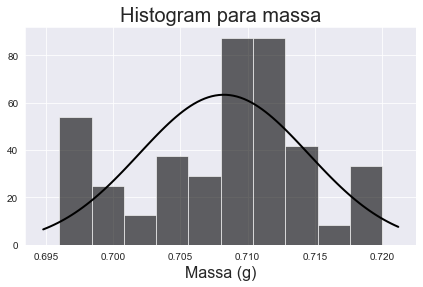

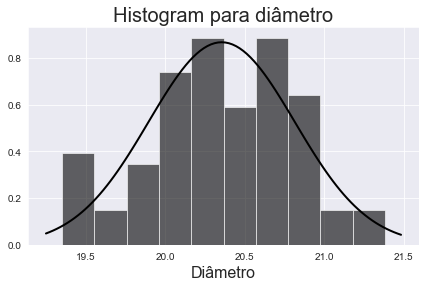

In [156]:
plt.figure(figsize=(7, 4))
sns.set_style("darkgrid")

# plt.hist(scaled_df['diam'], histtype = 'stepfilled')
plt.hist(massa_concat['value'], bins=10, density=True, alpha=0.6, color = 'k')
# Plot the PDF.
xmin, xmax = plt.xlim()
# plt.ylim(top=0.5)
x = np.linspace(xmin, xmax, 100)
mu, std = stats.norm.fit(massa_concat['value'])
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)



plt.title('Histogram para massa', fontsize = 20)
plt.xlabel('Massa (g)', fontsize = 16)
plt.savefig('./figures/hist_massa.png', dpi=500)
plt.show()

plt.figure(figsize=(7, 4))
sns.set_style("darkgrid")


# plt.hist(scaled_df['diam'], histtype = 'stepfilled')
plt.hist(diametro_concat['value'], bins=10, density=True, alpha=0.6, color = 'k')
# Plot the PDF.
xmin, xmax = plt.xlim()
# plt.ylim(top=0.5)
x = np.linspace(xmin, xmax, 100)
mu, std = stats.norm.fit(diametro_concat['value'])
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)


plt.title('Histogram para diâmetro', fontsize = 20)
plt.xlabel('Diâmetro', fontsize = 16)
plt.savefig('./figures/hist_diametro.png', dpi=500)
plt.show()

In [157]:
dict_color = {
    'Anel 1':'b',
    'Anel 2':'g',
    'Anel 3':'r',
    'Anel 4':'c',
    'Anel 5':'m',
    'Anel 6':'y',
    'Anel 7':'k',
    'Anel 8':'w',
    'Anel 9':'#20CEFF',
    'Anel 10':'#91FE0D'
} 

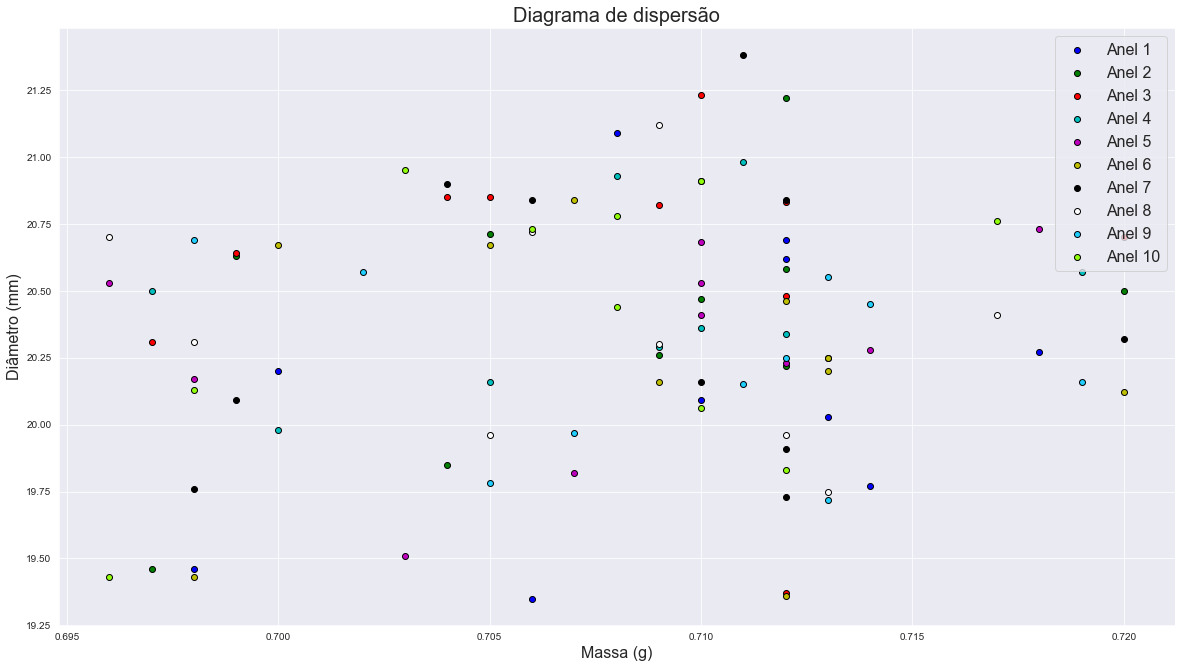

In [158]:
plt.figure(figsize=(20, 11))
sns.set_style("darkgrid")


for anel in aneis:
    massas = massa[anel]
    diametros = diametro[anel]
    
    scatter_data = pd.DataFrame({'Massa':massas, 'Diametro':diametros})
    plt.scatter(scatter_data['Massa'],scatter_data['Diametro'], c = dict_color[anel], linewidths = 1, edgecolors = 'k', label = anel)

plt.title('Diagrama de dispersão', fontsize = 20)
plt.xlabel('Massa (g)', fontsize = 16)
plt.ylabel('Diâmetro (mm)', fontsize = 16)
plt.legend(fontsize = 16)
plt.savefig('./figures/diag_dispersao_grupo.png', dpi=500)
plt.show()

In [159]:
diametro

,Anel 1,Anel 2,Anel 3,Anel 4,Anel 5,Anel 6,Anel 7,Anel 8,Anel 9,Anel 10
0,20.27,20.50,20.70,20.57,20.73,20.12,20.32,20.41,20.16,20.76
1,20.62,21.22,20.83,20.34,20.53,20.25,20.84,20.91,20.25,20.91
2,19.46,19.46,20.31,20.50,20.53,19.43,19.76,20.70,20.69,19.43
3,20.09,20.26,20.82,20.29,20.68,20.16,20.16,21.12,20.15,20.44
4,19.77,20.22,19.37,20.25,20.23,19.36,19.73,19.75,19.72,20.06
5,20.69,20.47,21.23,20.98,20.41,20.46,21.38,20.30,20.55,20.78
6,19.35,19.85,20.85,20.16,19.51,20.67,20.90,19.96,19.78,20.95
7,21.09,20.71,20.85,20.93,19.82,20.84,20.84,20.72,19.97,20.73
8,20.20,20.63,20.64,19.98,20.17,20.67,20.09,20.31,20.57,20.13
9,20.03,20.58,20.48,20.36,20.28,20.20,19.91,19.96,20.45,19.83
